**Alaa Hallak - Lab 1**
Pandas Tutorial

Step 0: Install pandas

In [ ]:
!pip install pandas
import pandas as pd
import sys
import scipy as sp
import matplotlib.pyplot as plt



2.2.2


step 1: Load in the IMDB movies dataset

In [ ]:
movies_df = pd.read_csv("IMDB-Movie-Data.csv",
index_col="Title")

step 2: View data

In [ ]:
 movies_df.head()
 print(movies_df.head(20))
 print(movies_df.tail(2))

                                         Rank                       Genre  \
Title                                                                       
Guardians of the Galaxy                     1     Action,Adventure,Sci-Fi   
Prometheus                                  2    Adventure,Mystery,Sci-Fi   
Split                                       3             Horror,Thriller   
Sing                                        4     Animation,Comedy,Family   
Suicide Squad                               5    Action,Adventure,Fantasy   
The Great Wall                              6    Action,Adventure,Fantasy   
La La Land                                  7          Comedy,Drama,Music   
Mindhorn                                    8                      Comedy   
The Lost City of Z                          9  Action,Adventure,Biography   
Passengers                                 10     Adventure,Drama,Romance   
Fantastic Beasts and Where to Find Them    11    Adventure,Family,Fantasy   

step 3: Get info about data

In [ ]:
movies_df.info()
movies_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


(1000, 11)

step 4: Handling duplicates

In [ ]:
temp_df= pd.concat([movies_df, movies_df]) #append is outdated
temp_df.shape
temp_df=temp_df.drop_duplicates()
temp_df.shape
temp_df.drop_duplicates(inplace=True)

In [ ]:
temp_df = pd.concat([movies_df, movies_df]) # make a new copy
temp_df.drop_duplicates(inplace=True, keep=False) #False: Drops all duplicates.
temp_df.shape

(0, 11)

step 5: Column cleanup

In [ ]:
movies_df.columns
movies_df.rename(columns={
'Runtime (Minutes)': 'Runtime',
'Revenue (Millions)': 'Revenue_millions' }, inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [ ]:
movies_df.columns = ['rank', 'genre', 'description', 'director',
                     'actors', 'year', 'runtime','rating', 'votes','revenue_millions','metascore']
movies_df.columns = [col.upper() for col in movies_df]
movies_df.columns = [col.lower() for col in movies_df]

step 6: Work with missing values

In [ ]:
#calculate the total number of null
movies_df.isnull()
movies_df.isnull().sum()

,0
rank,0
genre,0
description,0
director,0
actors,0
year,0
runtime,0
rating,0
votes,0
revenue_millions,128


In [ ]:
#Removing null values
movies_df.dropna()
movies_df.dropna(axis=1) #drop columns (columns are at index 1)

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


step 8: Understand variables

In [ ]:
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:
movies_df['genre'].describe()

,genre
count,1000
unique,207
top,"Action,Adventure,Sci-Fi"
freq,50


In [ ]:
movies_df['genre'].value_counts().head(10) #frequency of all values in a column

,count
genre,
"Action,Adventure,Sci-Fi",50
Drama,48
"Comedy,Drama,Romance",35
Comedy,32
"Drama,Romance",31
"Animation,Adventure,Comedy",27
"Action,Adventure,Fantasy",27
"Comedy,Drama",27
"Comedy,Romance",26


In [ ]:
movies_df.select_dtypes(include=['number']).corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
revenue_millions,-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


step 8: DataFrame slicing, selecting, extracting

In [ ]:
#By column
genre_col = movies_df[['genre']]
type(genre_col)
#pandas.core.frame.DataFrame
print(genre_col.head()) #I wanted to see the dataframe

                                            genre
Title                                            
Guardians of the Galaxy   Action,Adventure,Sci-Fi
Prometheus               Adventure,Mystery,Sci-Fi
Split                             Horror,Thriller
Sing                      Animation,Comedy,Family
Suicide Squad            Action,Adventure,Fantasy


In [ ]:
#adding another column name
subset = movies_df[['genre', 'rating']]
subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


In [ ]:
#By rows
prom = movies_df.loc["Prometheus"]
print(prom.head(3))
promi = movies_df.iloc[1]
print(promi.head(3))


rank                                                           2
genre                                   Adventure,Mystery,Sci-Fi
description    Following clues to the origin of mankind, a te...
Name: Prometheus, dtype: object
rank                                                           2
genre                                   Adventure,Mystery,Sci-Fi
description    Following clues to the origin of mankind, a te...
Name: Prometheus, dtype: object


In [ ]:
movie_subset = movies_df.loc['Prometheus':'Sing']
movie_subset



,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [ ]:
movie_subseti = movies_df.iloc[1:4]
movie_subseti

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [ ]:
#Conditional selections
condition = (movies_df['director'] == "Ridley Scott")
condition.head()

,director
Title,
Guardians of the Galaxy,False
Prometheus,True
Split,False
Sing,False
Suicide Squad,False


In [ ]:
movies_df[movies_df['rating'] >= 8.6].head(20)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
Kimi no na wa,97,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
Dangal,118,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
The Intouchables,250,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0


In [ ]:
movies_df[movies_df['director'].isin(['Christopher Nolan','Ridley Scott'])].head() #has either chris or ridley
#used isin() instead of | and == to be more concise


,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


In [ ]:
#all movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue
movies_df[
((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
& (movies_df['rating'] > 8.0)
& (movies_df['revenue_millions'] <
movies_df['revenue_millions'].quantile(0.25)) ]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


In [ ]:
#Applying functions
def rating_function(x):

    if x >= 8.0:
      return "good"

    else:
      return "bad"

movies_df["rating_category"] = movies_df["rating"].apply(rating_function)
movies_df.head(5)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,bad
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,bad
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,bad


step 10: Brief Plotting

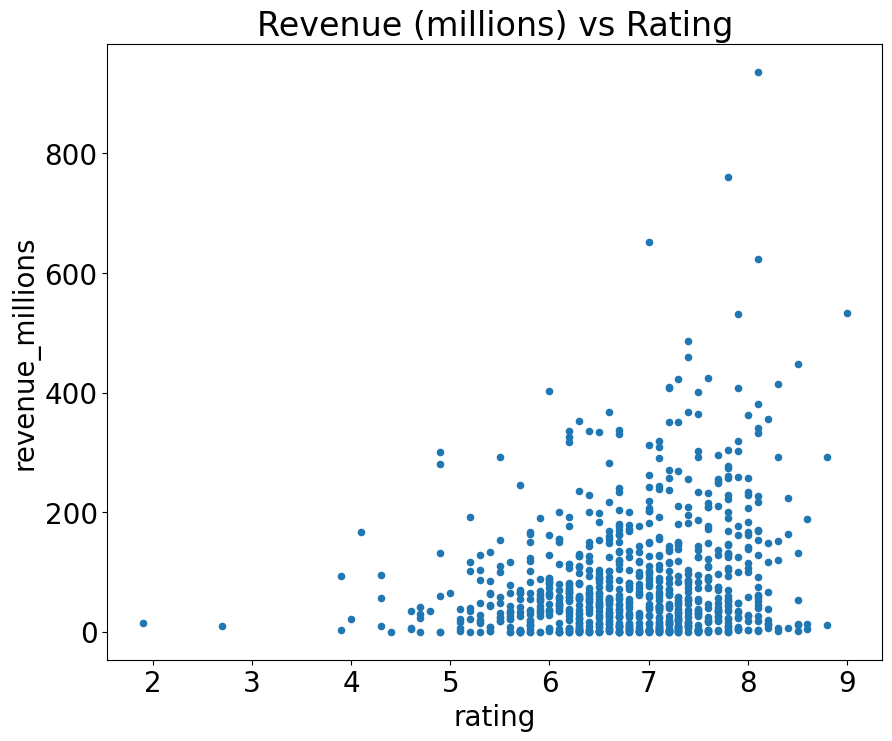

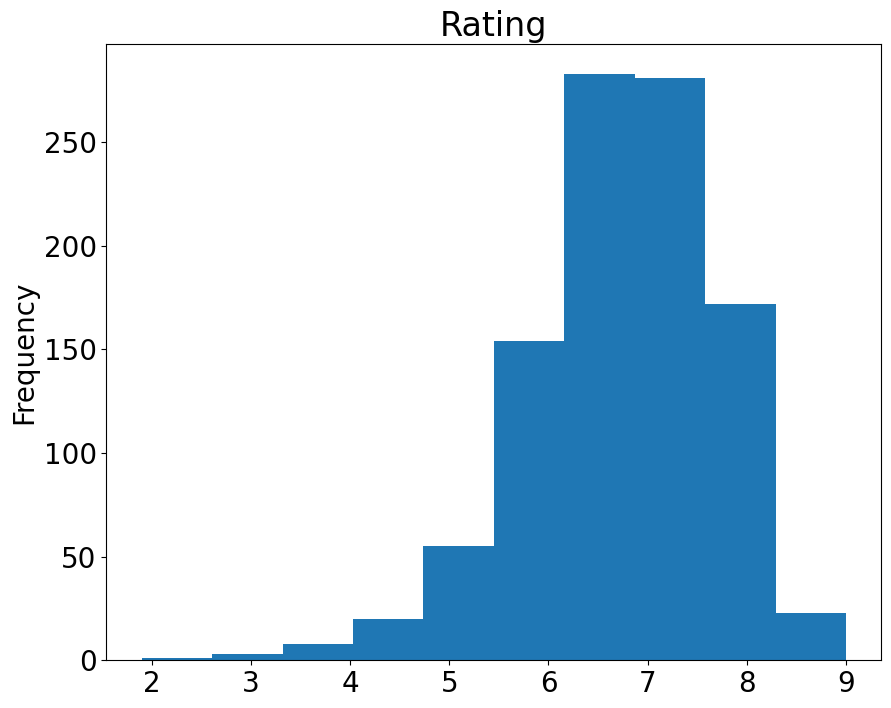

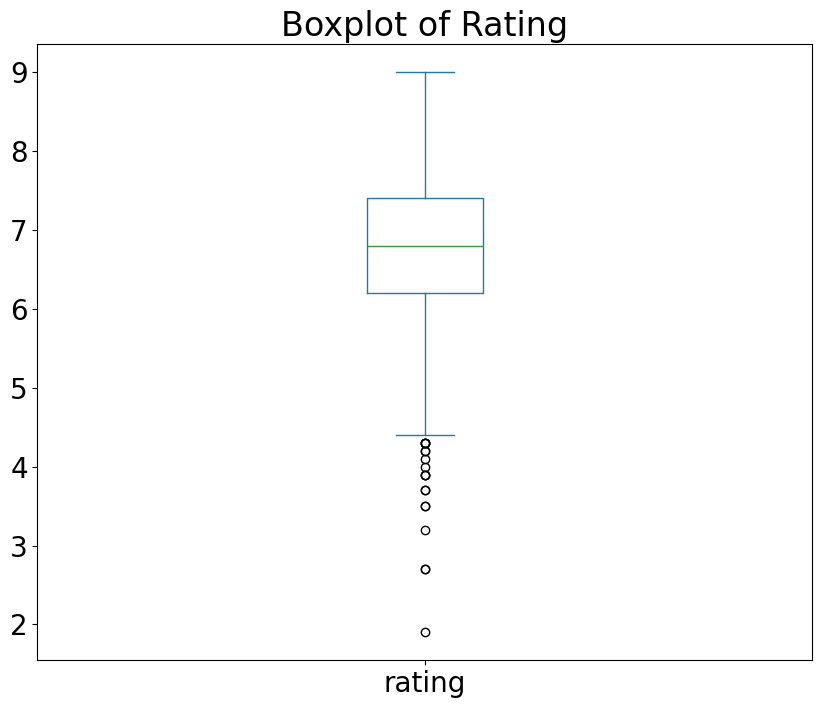

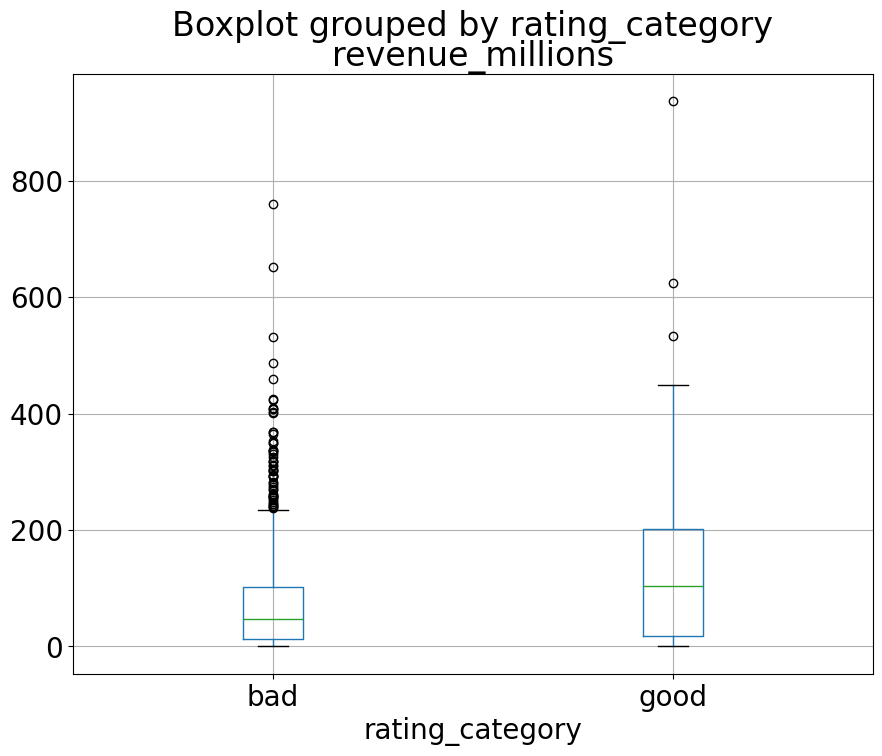

In [ ]:
#import matplotlib.pyplot as plt (put it in step 0)
plt.rcParams.update({'font.size': 20,'figure.figsize': (10, 8)}) # set font and plot size to be larger

movies_df.plot(kind='scatter', x='rating', y='revenue_millions'
,title='Revenue (millions) vs Rating');
plt.show() #so the plots don't overlap

movies_df['rating'].plot(kind='hist', title='Rating');
plt.show()

movies_df['rating'].plot(kind="box", title='Boxplot of Rating'); #put a title
plt.show()

movies_df.boxplot(column='revenue_millions',by='rating_category');[[]]
plt.show()